Files already downloaded and verified
Files already downloaded and verified

Testing SGD Optimizer...
Epoch 1, Loss: 2.3011, Accuracy: 10.14%, Duration: 5.61 seconds, Learning Rate: 0.001
Epoch 2, Loss: 2.2973, Accuracy: 10.36%, Duration: 5.16 seconds, Learning Rate: 0.001
Epoch 3, Loss: 2.2923, Accuracy: 12.66%, Duration: 5.16 seconds, Learning Rate: 0.001
Epoch 4, Loss: 2.2843, Accuracy: 18.17%, Duration: 5.16 seconds, Learning Rate: 0.001
Epoch 5, Loss: 2.2688, Accuracy: 21.96%, Duration: 5.16 seconds, Learning Rate: 0.001
Precision: 0.16, Recall: 0.13, F1-Score: 0.09


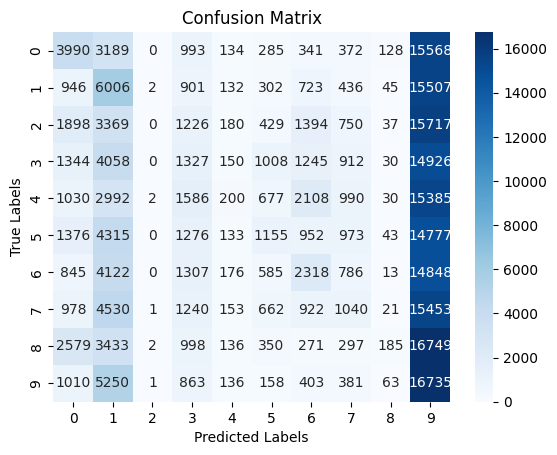


Testing SGD + Momentum Optimizer...
Epoch 1, Loss: 2.2131, Accuracy: 25.65%, Duration: 5.22 seconds, Learning Rate: 0.001
Epoch 2, Loss: 1.9403, Accuracy: 33.04%, Duration: 5.25 seconds, Learning Rate: 0.001
Epoch 3, Loss: 1.7561, Accuracy: 38.69%, Duration: 5.24 seconds, Learning Rate: 0.001
Epoch 4, Loss: 1.6200, Accuracy: 43.84%, Duration: 5.24 seconds, Learning Rate: 0.001
Epoch 5, Loss: 1.5383, Accuracy: 44.84%, Duration: 5.24 seconds, Learning Rate: 0.001
Precision: 0.33, Recall: 0.34, F1-Score: 0.32


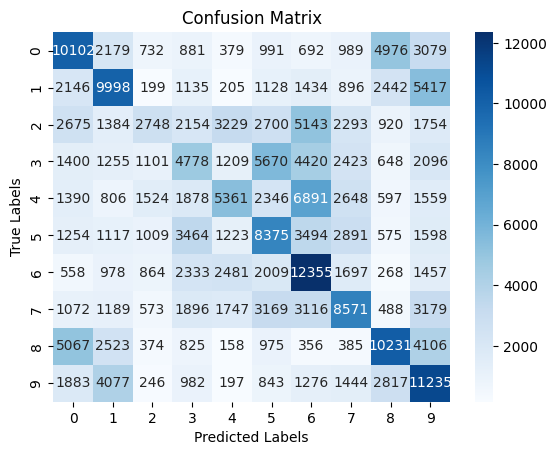


Testing Adam Optimizer...
Epoch 1, Loss: 1.5646, Accuracy: 54.31%, Duration: 5.30 seconds, Learning Rate: 0.001
Epoch 2, Loss: 1.2039, Accuracy: 61.68%, Duration: 5.30 seconds, Learning Rate: 0.001
Epoch 3, Loss: 1.0439, Accuracy: 66.81%, Duration: 5.32 seconds, Learning Rate: 0.001
Epoch 4, Loss: 0.9449, Accuracy: 68.27%, Duration: 5.32 seconds, Learning Rate: 0.001
Epoch 5, Loss: 0.8800, Accuracy: 70.77%, Duration: 5.33 seconds, Learning Rate: 0.001
Precision: 0.59, Recall: 0.59, F1-Score: 0.59


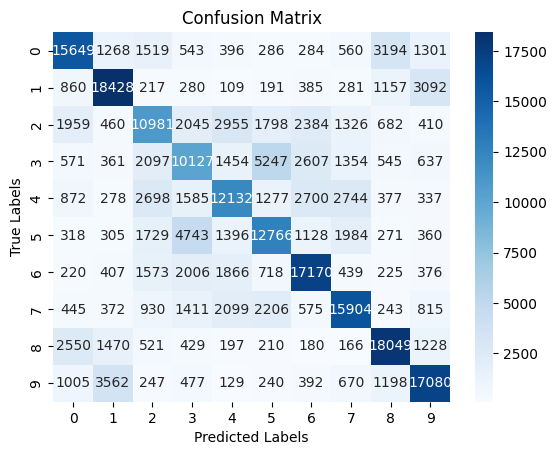


Testing RMSprop Optimizer...
Epoch 1, Loss: 1.7307, Accuracy: 47.80%, Duration: 5.27 seconds, Learning Rate: 0.001
Epoch 2, Loss: 1.2680, Accuracy: 61.13%, Duration: 5.27 seconds, Learning Rate: 0.001
Epoch 3, Loss: 1.0729, Accuracy: 60.16%, Duration: 5.28 seconds, Learning Rate: 0.001
Epoch 4, Loss: 0.9626, Accuracy: 66.80%, Duration: 5.25 seconds, Learning Rate: 0.001
Epoch 5, Loss: 0.8847, Accuracy: 59.77%, Duration: 5.28 seconds, Learning Rate: 0.001
Precision: 0.58, Recall: 0.58, F1-Score: 0.58


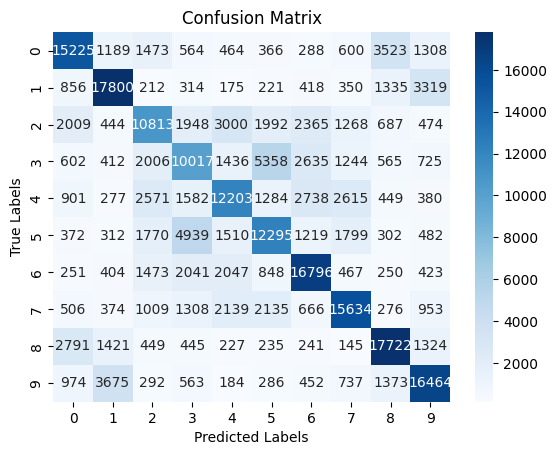


Testing AdaMomentum Optimizer...
Epoch 1, Loss: 1.6267, Accuracy: 50.30%, Duration: 5.62 seconds, Learning Rate: 0.001
Epoch 2, Loss: 1.2970, Accuracy: 58.59%, Duration: 5.62 seconds, Learning Rate: 0.001
Epoch 3, Loss: 1.1497, Accuracy: 63.07%, Duration: 5.63 seconds, Learning Rate: 0.001
Epoch 4, Loss: 1.0428, Accuracy: 66.50%, Duration: 5.63 seconds, Learning Rate: 0.001
Epoch 5, Loss: 0.9631, Accuracy: 68.18%, Duration: 5.63 seconds, Learning Rate: 0.001
Precision: 0.56, Recall: 0.56, F1-Score: 0.56


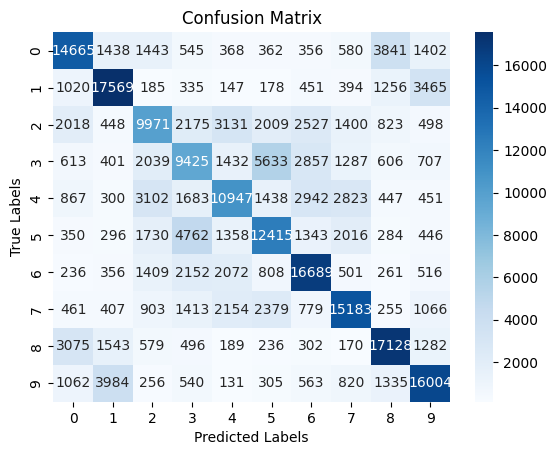

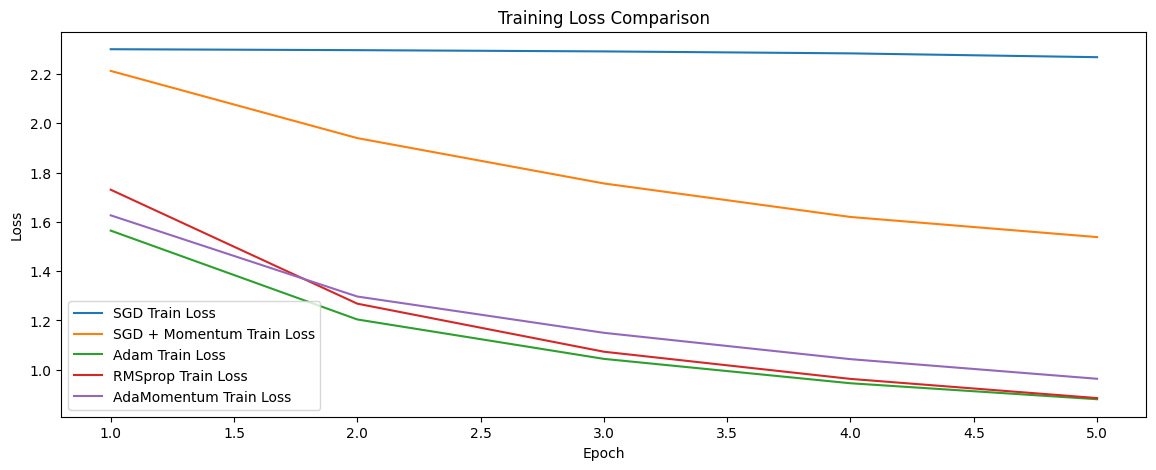

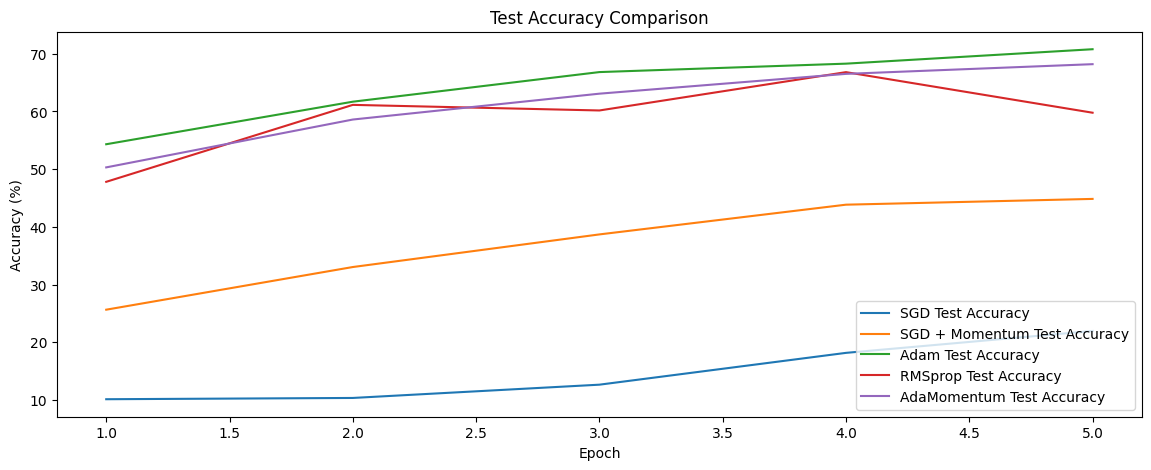

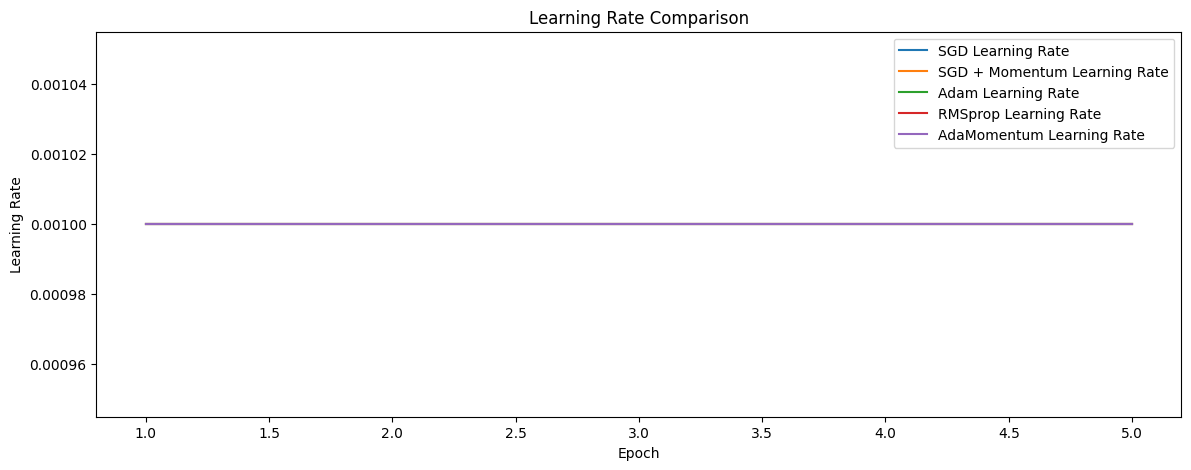

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import numpy as np
import time

# โหลดชุดข้อมูล CIFAR-10 ด้วยการปรับปรุงและ data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# สร้างโมเดล CNN ขั้นสูงสำหรับ CIFAR-10
class AdvancedCNN(nn.Module):
    def __init__(self):
        super(AdvancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = nn.ReLU()(self.fc1(self.dropout(x)))
        x = self.fc2(x)
        return x

# AdaMomentum optimizer class
class AdaMomentum(optim.Optimizer):
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8, weight_decay=0):
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        super(AdaMomentum, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['m'] = torch.zeros_like(p.data)
                    state['v'] = torch.zeros_like(p.data)
                    state['v_hat_prev'] = torch.zeros_like(p.data)

                m, v = state['m'], state['v']
                beta1, beta2 = group['betas']
                state['step'] += 1

                m.mul_(beta1).add_(grad, alpha=1 - beta1)
                v.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                m_hat = m / (1 - beta1 ** state['step'])
                v_hat = v / (1 - beta2 ** state['step'])

                if state['step'] == 1:
                    eta_t = group['lr']
                else:
                    eta_t = group['lr'] * (torch.sqrt((v_hat / (state['v_hat_prev'] + group['eps'])).mean()).clamp(max=10))

                p.data.addcdiv_(m_hat, torch.sqrt(v_hat) + group['eps'], value=-eta_t)
                state['v_hat_prev'] = v_hat.clone()

        return loss

# ฟังก์ชั่นการฝึกอบรมและทดสอบโมเดล
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, scheduler, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    train_loss = []
    test_accuracy = []
    epoch_times = []
    learning_rates = []
    all_preds = []
    all_targets = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        epoch_start_time = time.time()

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            all_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

        scheduler.step(total_loss / len(trainloader))
        epoch_duration = time.time() - epoch_start_time
        epoch_times.append(epoch_duration)
        train_loss.append(total_loss / len(trainloader))
        learning_rates.append(optimizer.param_groups[0]['lr'])

        model.eval()
        total_correct = 0
        total_samples = 0

        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)

        accuracy = 100 * total_correct / total_samples
        test_accuracy.append(accuracy)

        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(trainloader):.4f}, Accuracy: {accuracy:.2f}%, Duration: {epoch_duration:.2f} seconds, Learning Rate: {optimizer.param_groups[0]['lr']}")

    precision, recall, fscore, _ = precision_recall_fscore_support(all_targets, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_targets, all_preds)

    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {fscore:.2f}")
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    return train_loss, test_accuracy, epoch_times, learning_rates

# ทดสอบ Optimizers
results = {}
def test_optimizer(name, optimizer_class, **kwargs):
    print(f"\nTesting {name} Optimizer...")
    model = AdvancedCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_class(model.parameters(), **kwargs)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)
    train_loss, test_accuracy, epoch_times, learning_rates = train_and_evaluate(model, trainloader, testloader, optimizer, criterion, scheduler)
    results[name] = {
        "train_loss": train_loss,
        "test_accuracy": test_accuracy,
        "epoch_times": epoch_times,
        "learning_rates": learning_rates
    }

test_optimizer("SGD", optim.SGD, lr=0.001)
test_optimizer("SGD + Momentum", optim.SGD, lr=0.001, momentum=0.9)
test_optimizer("Adam", optim.Adam, lr=0.001)
test_optimizer("RMSprop", optim.RMSprop, lr=0.001)
test_optimizer("AdaMomentum", AdaMomentum, lr=0.001, betas=(0.9, 0.999))

# Plot training loss and accuracy
plt.figure(figsize=(14, 5))
for optimizer in results:
    plt.plot(range(1, 6), results[optimizer]["train_loss"], label=f"{optimizer} Train Loss")
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
for optimizer in results:
    plt.plot(range(1, 6), results[optimizer]["test_accuracy"], label=f"{optimizer} Test Accuracy")
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Plot learning rates
plt.figure(figsize=(14, 5))
for optimizer in results:
    plt.plot(range(1, 6), results[optimizer]["learning_rates"], label=f"{optimizer} Learning Rate")
plt.title('Learning Rate Comparison')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


Files already downloaded and verified
Files already downloaded and verified

Testing SGD Optimizer...
Epoch 1, Loss: 2.2935, Accuracy: 21.14%, Duration: 5.47 seconds, Learning Rate: 0.01
Epoch 2, Loss: 2.0965, Accuracy: 25.01%, Duration: 5.46 seconds, Learning Rate: 0.01
Epoch 3, Loss: 1.9248, Accuracy: 31.54%, Duration: 5.48 seconds, Learning Rate: 0.01
Epoch 4, Loss: 1.7972, Accuracy: 34.82%, Duration: 5.47 seconds, Learning Rate: 0.01
Epoch 5, Loss: 1.6881, Accuracy: 39.75%, Duration: 5.47 seconds, Learning Rate: 0.01
Epoch 6, Loss: 1.6031, Accuracy: 39.07%, Duration: 5.47 seconds, Learning Rate: 0.01
Epoch 7, Loss: 1.5322, Accuracy: 45.83%, Duration: 5.48 seconds, Learning Rate: 0.01
Epoch 8, Loss: 1.4756, Accuracy: 47.19%, Duration: 5.47 seconds, Learning Rate: 0.01
Epoch 9, Loss: 1.4224, Accuracy: 46.85%, Duration: 5.73 seconds, Learning Rate: 0.01
Epoch 10, Loss: 1.3870, Accuracy: 49.92%, Duration: 6.34 seconds, Learning Rate: 0.01
Precision: 0.36, Recall: 0.36, F1-Score: 0.35


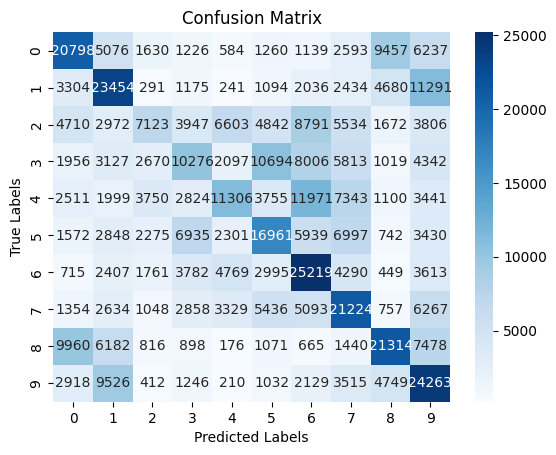


Testing SGD + Momentum Optimizer...
Epoch 1, Loss: 1.8845, Accuracy: 41.98%, Duration: 5.84 seconds, Learning Rate: 0.01
Epoch 2, Loss: 1.4203, Accuracy: 55.41%, Duration: 5.50 seconds, Learning Rate: 0.01
Epoch 3, Loss: 1.1762, Accuracy: 61.82%, Duration: 5.52 seconds, Learning Rate: 0.01
Epoch 4, Loss: 0.9855, Accuracy: 69.50%, Duration: 5.51 seconds, Learning Rate: 0.01
Epoch 5, Loss: 0.8743, Accuracy: 72.93%, Duration: 5.50 seconds, Learning Rate: 0.01
Epoch 6, Loss: 0.7835, Accuracy: 73.81%, Duration: 5.52 seconds, Learning Rate: 0.01
Epoch 7, Loss: 0.7244, Accuracy: 76.23%, Duration: 5.52 seconds, Learning Rate: 0.01
Epoch 8, Loss: 0.6696, Accuracy: 76.38%, Duration: 5.50 seconds, Learning Rate: 0.01
Epoch 9, Loss: 0.6307, Accuracy: 78.59%, Duration: 5.51 seconds, Learning Rate: 0.01
Epoch 10, Loss: 0.5996, Accuracy: 79.99%, Duration: 5.52 seconds, Learning Rate: 0.01
Precision: 0.65, Recall: 0.65, F1-Score: 0.65


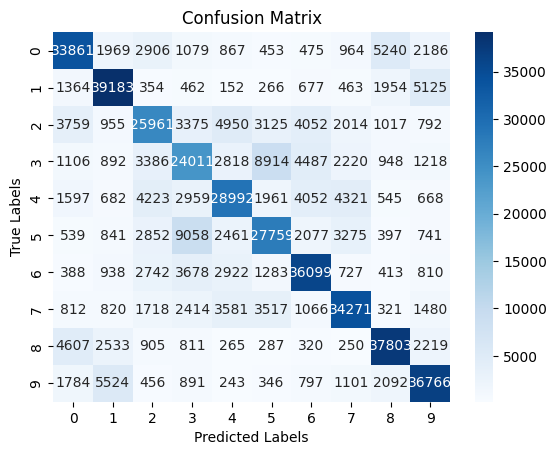


Testing Adam Optimizer...
Epoch 1, Loss: 1.5613, Accuracy: 55.13%, Duration: 5.68 seconds, Learning Rate: 0.001
Epoch 2, Loss: 1.1209, Accuracy: 61.91%, Duration: 5.65 seconds, Learning Rate: 0.001
Epoch 3, Loss: 0.9539, Accuracy: 68.69%, Duration: 5.64 seconds, Learning Rate: 0.001
Epoch 4, Loss: 0.8506, Accuracy: 73.08%, Duration: 5.65 seconds, Learning Rate: 0.001
Epoch 5, Loss: 0.7930, Accuracy: 74.07%, Duration: 5.66 seconds, Learning Rate: 0.001
Epoch 6, Loss: 0.7387, Accuracy: 75.66%, Duration: 5.66 seconds, Learning Rate: 0.001
Epoch 7, Loss: 0.6962, Accuracy: 76.39%, Duration: 5.64 seconds, Learning Rate: 0.001
Epoch 8, Loss: 0.6685, Accuracy: 77.21%, Duration: 5.65 seconds, Learning Rate: 0.001
Epoch 9, Loss: 0.6453, Accuracy: 77.58%, Duration: 5.64 seconds, Learning Rate: 0.001
Epoch 10, Loss: 0.6223, Accuracy: 79.44%, Duration: 5.64 seconds, Learning Rate: 0.001
Precision: 0.69, Recall: 0.69, F1-Score: 0.69


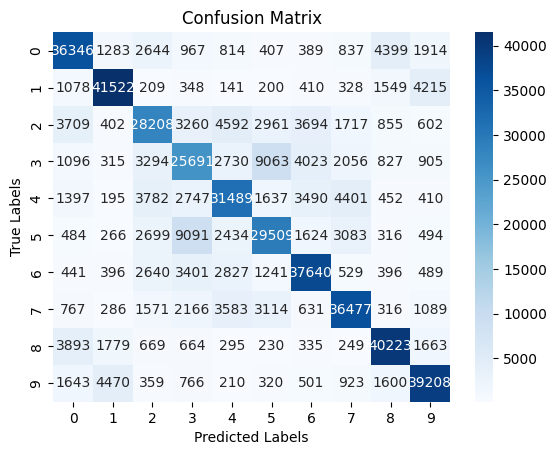


Testing RMSprop Optimizer...
Epoch 1, Loss: 2.2960, Accuracy: 42.10%, Duration: 5.55 seconds, Learning Rate: 0.001
Epoch 2, Loss: 1.3909, Accuracy: 48.85%, Duration: 5.54 seconds, Learning Rate: 0.001
Epoch 3, Loss: 1.1366, Accuracy: 57.17%, Duration: 5.55 seconds, Learning Rate: 0.001
Epoch 4, Loss: 0.9821, Accuracy: 63.96%, Duration: 5.54 seconds, Learning Rate: 0.001
Epoch 5, Loss: 0.8882, Accuracy: 56.19%, Duration: 5.55 seconds, Learning Rate: 0.001
Epoch 6, Loss: 0.8244, Accuracy: 65.08%, Duration: 5.54 seconds, Learning Rate: 0.001
Epoch 7, Loss: 0.7701, Accuracy: 70.73%, Duration: 5.55 seconds, Learning Rate: 0.001
Epoch 8, Loss: 0.7379, Accuracy: 73.04%, Duration: 5.57 seconds, Learning Rate: 0.001
Epoch 9, Loss: 0.7071, Accuracy: 74.50%, Duration: 5.55 seconds, Learning Rate: 0.001
Epoch 10, Loss: 0.6826, Accuracy: 74.52%, Duration: 5.56 seconds, Learning Rate: 0.001
Precision: 0.65, Recall: 0.65, F1-Score: 0.65


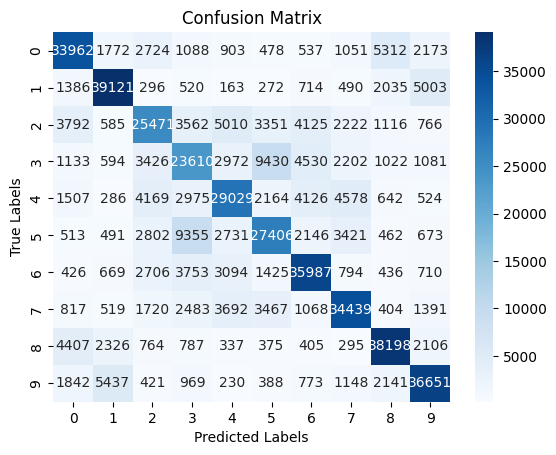


Testing AdaMomentum Optimizer...
Epoch 1, Loss: 1.6025, Accuracy: 54.33%, Duration: 6.00 seconds, Learning Rate: 0.001
Epoch 2, Loss: 1.1684, Accuracy: 62.32%, Duration: 6.01 seconds, Learning Rate: 0.001
Epoch 3, Loss: 0.9649, Accuracy: 68.03%, Duration: 6.02 seconds, Learning Rate: 0.001
Epoch 4, Loss: 0.8484, Accuracy: 72.12%, Duration: 6.01 seconds, Learning Rate: 0.001
Epoch 5, Loss: 0.7739, Accuracy: 73.95%, Duration: 6.02 seconds, Learning Rate: 0.001
Epoch 6, Loss: 0.7199, Accuracy: 75.55%, Duration: 6.00 seconds, Learning Rate: 0.001
Epoch 7, Loss: 0.6764, Accuracy: 78.05%, Duration: 6.00 seconds, Learning Rate: 0.001
Epoch 8, Loss: 0.6459, Accuracy: 77.52%, Duration: 6.00 seconds, Learning Rate: 0.001
Epoch 9, Loss: 0.6180, Accuracy: 77.74%, Duration: 6.00 seconds, Learning Rate: 0.001
Epoch 10, Loss: 0.5903, Accuracy: 78.87%, Duration: 6.00 seconds, Learning Rate: 0.001
Precision: 0.69, Recall: 0.69, F1-Score: 0.69


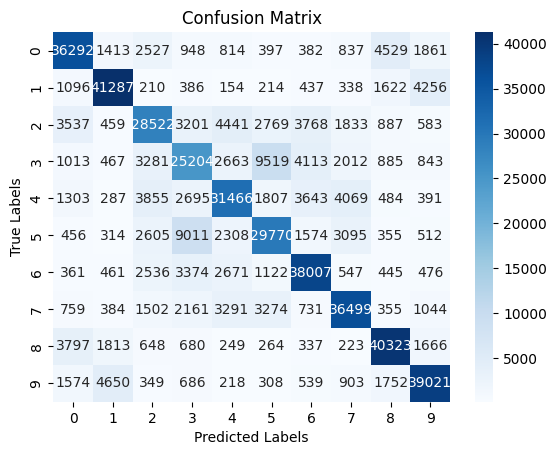

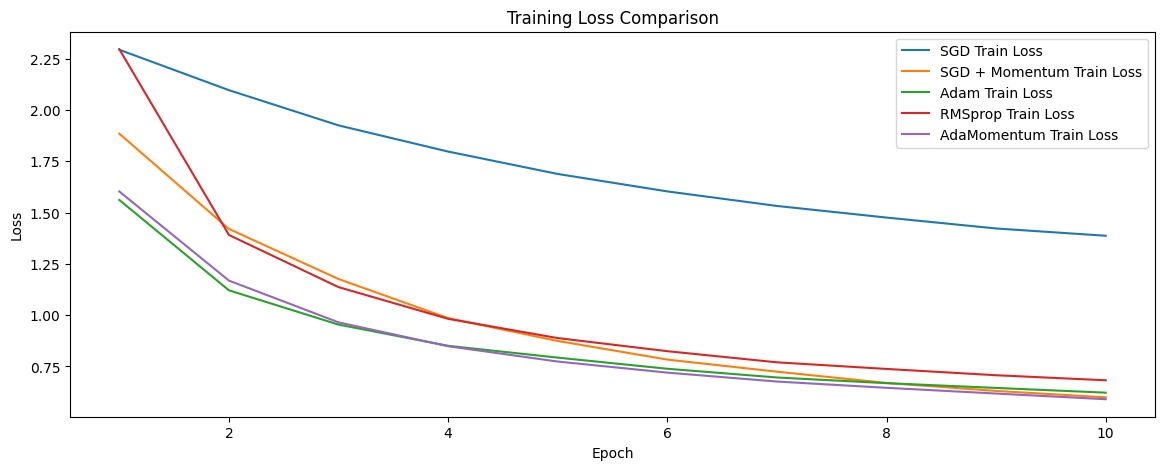

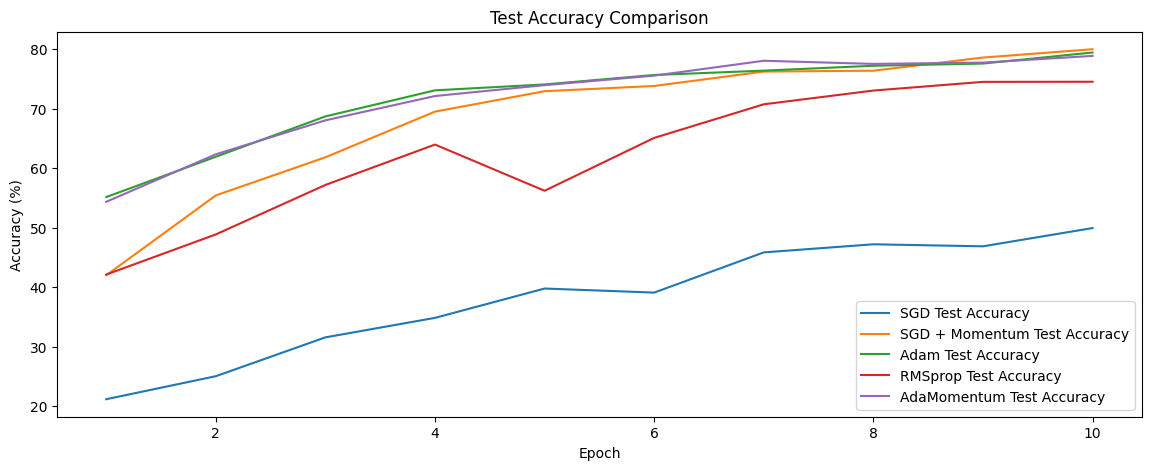

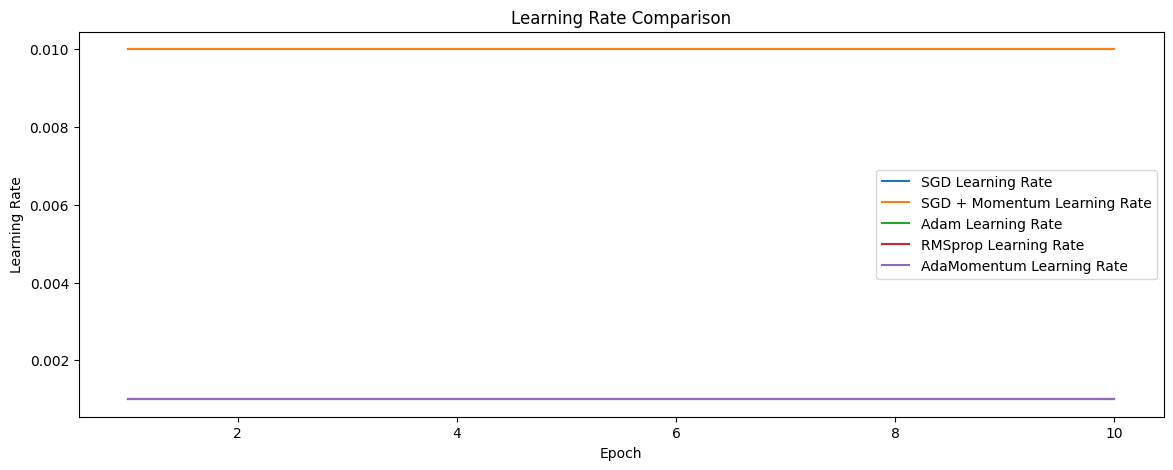

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import numpy as np
import time

# โหลดชุดข้อมูล CIFAR-10 ด้วยการปรับปรุงและ data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# สร้างโมเดล CNN ขั้นสูงสำหรับ CIFAR-10
class AdvancedCNN(nn.Module):
    def __init__(self):
        super(AdvancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)
        self.fc2 = nn.Linear(1024, 10)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = self.pool(nn.ReLU()(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = nn.ReLU()(self.fc1(self.dropout(x)))
        x = self.fc2(x)
        return x

# AdaMomentum optimizer class
class AdaMomentum(optim.Optimizer):
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8, weight_decay=0):
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        super(AdaMomentum, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['m'] = torch.zeros_like(p.data)
                    state['v'] = torch.zeros_like(p.data)
                    state['v_hat_prev'] = torch.zeros_like(p.data)

                m, v = state['m'], state['v']
                beta1, beta2 = group['betas']
                state['step'] += 1

                m.mul_(beta1).add_(grad, alpha=1 - beta1)
                v.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                m_hat = m / (1 - beta1 ** state['step'])
                v_hat = v / (1 - beta2 ** state['step'])

                if state['step'] == 1:
                    eta_t = group['lr']
                else:
                    eta_t = group['lr'] * (torch.sqrt((v_hat / (state['v_hat_prev'] + group['eps'])).mean()).clamp(max=10))

                p.data.addcdiv_(m_hat, torch.sqrt(v_hat) + group['eps'], value=-eta_t)
                state['v_hat_prev'] = v_hat.clone()

        return loss

# ฟังก์ชั่นการฝึกอบรมและทดสอบโมเดล
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, scheduler, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    train_loss = []
    test_accuracy = []
    epoch_times = []
    learning_rates = []
    all_preds = []
    all_targets = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        epoch_start_time = time.time()

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            all_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

        scheduler.step(total_loss / len(trainloader))
        epoch_duration = time.time() - epoch_start_time
        epoch_times.append(epoch_duration)
        train_loss.append(total_loss / len(trainloader))
        learning_rates.append(optimizer.param_groups[0]['lr'])

        model.eval()
        total_correct = 0
        total_samples = 0

        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)

        accuracy = 100 * total_correct / total_samples
        test_accuracy.append(accuracy)

        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(trainloader):.4f}, Accuracy: {accuracy:.2f}%, Duration: {epoch_duration:.2f} seconds, Learning Rate: {optimizer.param_groups[0]['lr']}")

    precision, recall, fscore, _ = precision_recall_fscore_support(all_targets, all_preds, average='macro')
    conf_matrix = confusion_matrix(all_targets, all_preds)

    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {fscore:.2f}")
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    return train_loss, test_accuracy, epoch_times, learning_rates

# ทดสอบ Optimizers
results = {}
def test_optimizer(name, optimizer_class, **kwargs):
    print(f"\nTesting {name} Optimizer...")
    model = AdvancedCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_class(model.parameters(), **kwargs)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
    train_loss, test_accuracy, epoch_times, learning_rates = train_and_evaluate(model, trainloader, testloader, optimizer, criterion, scheduler)
    results[name] = {
        "train_loss": train_loss,
        "test_accuracy": test_accuracy,
        "epoch_times": epoch_times,
        "learning_rates": learning_rates
    }

test_optimizer("SGD", optim.SGD, lr=0.01)
test_optimizer("SGD + Momentum", optim.SGD, lr=0.01, momentum=0.9)
test_optimizer("Adam", optim.Adam, lr=0.001)
test_optimizer("RMSprop", optim.RMSprop, lr=0.001)
test_optimizer("AdaMomentum", AdaMomentum, lr=0.001, betas=(0.9, 0.999))

# Plot training loss and accuracy
plt.figure(figsize=(14, 5))
for optimizer in results:
    plt.plot(range(1, 11), results[optimizer]["train_loss"], label=f"{optimizer} Train Loss")
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
for optimizer in results:
    plt.plot(range(1, 11), results[optimizer]["test_accuracy"], label=f"{optimizer} Test Accuracy")
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Plot learning rates
plt.figure(figsize=(14, 5))
for optimizer in results:
    plt.plot(range(1, 11), results[optimizer]["learning_rates"], label=f"{optimizer} Learning Rate")
plt.title('Learning Rate Comparison')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()
